In [13]:
nltk.download('gutenberg')
nltk.download('webtext')
nltk.download('punkt')
nltk.download('udhr')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Package udhr is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [35]:
# Using built NLTK built-in text corpus and its methods.
# You can load and use your own external texts. See the part "Load your own text" 
# More info at https://www.nltk.org/book/ch02.html
#from __future__ import print_function
import nltk
# Uncomment the download dialouge in case you don't have the corpora
#nltk.download()
import matplotlib.pyplot as plt #Just in case of edditing the nltk plots, because nltk uses matplotlib.

#from nltk.book import * #This says "from NLTK's book module, load all items."
# It is just a small module for educational purpose in chapter 1 of the NLTK tutorial
# In this code we teplicate the classes that has been used in nltk.book module
from nltk.corpus import gutenberg, webtext
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.util import bigrams
from nltk.util import trigrams
from nltk.util import ngrams
from nltk import word_tokenize


#Loading
###########################################

gutenberg_fileids = gutenberg.fileids()
webtext_fileids = webtext.fileids()

print('File ids of the gutenberg corpus:\n{}\n'.format(gutenberg.fileids()))
print('File ids of the webtext corpus:\n{}\n'.format(webtext.fileids()))

#Selecting two sample text
text1_id = gutenberg.fileids()[0]
text2_id= webtext.fileids()[1]
print('Text1 id is: ',text1_id)
print('Text2 id is: ',text2_id)
text1_words=gutenberg.words(text1_id)
text2_words=webtext.words(text2_id)
print()

#Printing a part of sample texts
print('Text1_words : ',text1_words[0:10])
print('Text2_words : ',text2_words[0:10])
print()

#Accesing
print('Index of the token "flower" in text1_words: ', text1_words.index('flower'))
print('Token number 110552 in text1_words: ', text1_words[110552])
print()

#Using nltk raw string
######################
#Notice the difference between raw text and rejoined text1_words. The later one has extra whitespaces and no line break.
text1_raw=gutenberg.raw(text1_id)
text1_string=" ".join(text1_words)
print('Text1_raw, first 100 characters:\n',text1_raw[0:100])
print()
print('Text1_string, made with join() method has extra whitespaces:\n',text1_string[0:100])
print()

File ids of the gutenberg corpus:
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']

File ids of the webtext corpus:
['firefox.txt', 'grail.txt', 'overheard.txt', 'pirates.txt', 'singles.txt', 'wine.txt']

Text1 id is:  austen-emma.txt
Text2 id is:  grail.txt

Text1_words :  ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']
Text2_words :  ['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop']

Index of the token "flower" in text1_words:  110552
Token number 110552 in text1_words:  flower

Text1_raw, first 100 characters:
 [Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhous

Characters number of text1_raw austen-emma.txt: 887071
Words number of text1_raw austen-emma.txt: 192427 
Sentences number of text1_raw austen-emma.txt: 7752 

Characters number of text1_string austen-emma.txt: 915041

Unique tokens number in text1_words is:  7811
Occurence number of the word "good" in text1_words is:  340

Type of the variable "text1_raw" : <class 'str'>
Tokens number of text1_raw austen-emma.txt using split(): 158167 
Tokens number of text1_raw austen-emma.txt using nltk.word_tokenize: 191673 

Type of the variable "fd" : <class 'nltk.probability.FreqDist'>

Most frequent words in text1_list:
 [(',', 12016), ('.', 6355), ('to', 5124), ('the', 4842), ('and', 4652), ('of', 4272), ('I', 3164), ('--', 3100), ('a', 3001), ("''", 2452)]

Words that occures between 1000 and 2000 times in text1_list, sorted by frequency:
 [('!', 1063), ('his', 1084), ('Mr.', 1089), ('but', 1148), ('very', 1151), ('with', 1185), ('is', 1221), ('have', 1301), ('for', 1320), ('he', 1365), ('as'

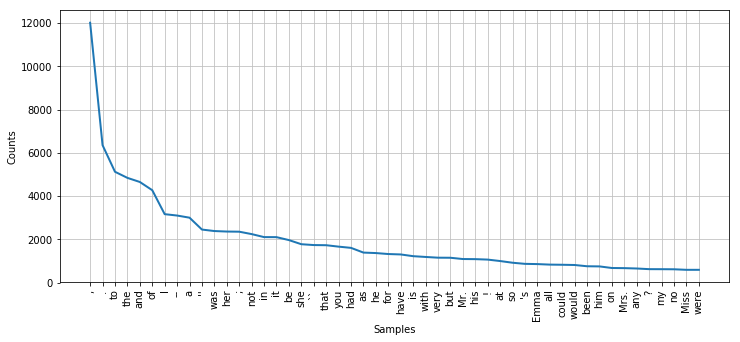

Frequency distribution of the word "good" : 0.008671017827237013
Frequency (number of occurences) the word "good" : 1662

The 10 longest words:  ['incomprehensible', 'misunderstanding', 'unseasonableness', 'self-contentment', 'unceremoniousness', 'backgammon-table', 'self-consequence', 'fore-shortening.', 'cheerful-tempered', 'self-examination']



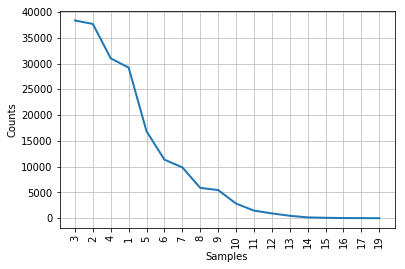

Table of word frequency by length
    3     2     4     1     5     6     7     8     9    10    11    12    13    14    15    16    17    19 
38367 37701 31011 29228 16864 11363  9857  5877  5453  2831  1470   927   463   149    76    26     9     1 


LookupError: ignored

In [7]:
#Tokenizing and Counting
###########################################
###########################################

#Note: For counting the characters you must use e.g. raw text. If your text string is made by the join() method 
#      from a list, your text will have extra whitespace. e.g.   I asked her: "how are you?"
#                                                         vs     I asked her : " how are you ? "
######################
######################

#Text lengths
characters_number = len(gutenberg.raw(text1_id))
words_number = len(gutenberg.words(text1_id))
sentences_number = len(gutenberg.sents(text1_id))

print('Characters number of text1_raw {}: {}'.format(text1_id, characters_number))
print('Words number of text1_raw {}: {} '.format(text1_id, words_number))
print('Sentences number of text1_raw {}: {} '.format(text1_id, sentences_number))
print()
print('Characters number of text1_string {}: {}'.format(text1_id, len(text1_string)))
print()


#notice that set return a list of unique tokens
######################
vocabs=len(set(text1_words))
print('Unique tokens number in text1_words is: ', vocabs) #notice that set return a list of unique tokens
print('Occurence number of the word "good" in text1_words is: ',text1_words.count('good'))
print()
print('Type of the variable "text1_raw" :', type(text1_raw))
#Tokenizing with python split() method
print('Tokens number of text1_raw {} using split(): {} '.format(text1_id, len(text1_raw.split())))
#Tokenizing with python nltk.word_tokenize
print('Tokens number of text1_raw {} using nltk.word_tokenize: {} '.format(text1_id, len(word_tokenize(text1_raw))))
print()

#Creating text list (using a list instead of NLTK list object - text1_words)
text1_list=word_tokenize(text1_raw)

# Frequency analysis -highest, rarest, particular frequencies
###########################################

# Creates a new data object that contains information about word frequency
######################
fd = nltk.FreqDist(text1_list)
print('Type of the variable "fd" :', type(fd))
#fd.keys(), fd.values(), fd.items()
print()

most_frequent=fd.most_common()
print('Most frequent words in text1_list:\n', most_frequent[0:10])
print()

# Custom range - Fine-grained Selection of Words
######################
# Note: most_common() mehtod gives a list of tuples
most_frequent=fd.most_common()
costum_frequency= [instance for instance in most_frequent if 1000 <= instance[1] <= 2000]

# Sort by frequency ascending
# For sort() complex lists see https://docs.python.org/3/howto/sorting.html
costum_frequency=sorted(costum_frequency, key=lambda instance: instance[1])
print('Words that occures between 1000 and 2000 times in text1_list, sorted by frequency:\n', costum_frequency)
print()

# Sort by frequency descending
costum_frequency=sorted(costum_frequency, key=lambda instance: instance[1],reverse=True)

# Sort by words
costum_frequency=sorted(costum_frequency, key=lambda instance: instance[0])      
print('Words that occures between 1000 and 2000 times in text1_list, sorted alphabetically:\n', costum_frequency)
print()

# Find the frequency of a list of words.
sample_list=['God','are','you','cat']
costum_frequency= sorted([instance for instance in most_frequent if instance[0] in sample_list]) # Sorted ascendingly
print('Frequency of a particular list of words that appear in text1_list:\n', costum_frequency)
print()

# Very rare words
# If the frequent words don't help us, how about the words that occur once only. View them by hapaxes() method.
rare_words=fd.hapaxes()
print('Words that appeared only onece in text1_list:\n',rare_words[0:10])
print()

# 50 first most frequent words of text1_list
plt.figure(figsize=(12, 5))  # the size you want
fd.plot(50,cumulative=False) 


# Frequency diatribution of the word 'good'
print('Frequency distribution of the word "good" :',fd.freq('you'))
print('Frequency (number of occurences) the word "good" :',fd['you'])
print()

#Length analysis - longest, smallest, table of lengths
###########################################

# Creates a list of unique words with no duplicates.
vocabs_list=set(text1_list)

# lengths of the words in text1_list
lengths = [len(word) for word in text1_list]
fd = nltk.FreqDist(lengths)

# The 10 largest words
# Notice to the use of vocabs_list instead of text1_list
long_words = [word for word in vocabs_list if len(word)>15];
print('The 10 longest words: ', long_words[-10:])
print()
# Plot of word lengths
######################
fd.plot(cumulative=False)
# Table of word lengths
######################
# Because the lengths of words can't be very high, e.g. between 1 to 20, it's better to see them on a table.
print('Table of word frequency by length')
fd.tabulate()

# Conditional Frequency Distribution
# Word lengths in 4 different languages
######################
from nltk.corpus import udhr
languages = ['English-Latin1', 'German_Deutsch-Latin1',
     'Greenlandic_Inuktikut-Latin1', 'Ibibio_Efik-Latin1','Farsi_Persian-UTF8']
cfd = nltk.ConditionalFreqDist(
           (lang, len(word))
           for lang in languages
           for word in udhr.words(lang))
plt.figure(figsize=(12, 5))
cfd.plot(cumulative=False)

Type of the variable "text1_words" : <class 'nltk.corpus.reader.util.StreamBackedCorpusView'>
Type of the variable "text1_list" : <class 'list'>

3 concordance of the word "exactly":
Displaying 3 of 57 matches:
ssible for him not to say exactly as he had said at dinner 
on little matters , which exactly suited Mr. Woodhouse , fu
ning , looking forward to exactly such a close of the prese

"exactly" similar contexs:
of in to just by and as all on know emma with was have now were so not
beyond among

"exactly" and "just" common contexs (tokens in left and rightside):
which_suited is_what was_the sitting_opposite


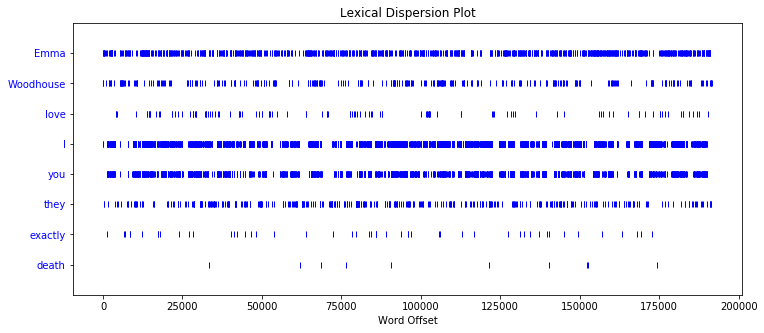

Words that endwith "ness": ['politeness', 'shortness', 'happiness', 'witness']
Words that startwith "con": ['connected', 'conscience-stricken', 'consisting', 'concealment.']

Words that contain "ee": ['proceeded', 'cheek', 'feeding', 'needlework']
Words that contain "ee" and endwith "ing": ['feeding', 'sleeping', 'seeking', 'cheering']

Lexical_diversity of text1 austen-emma.txt: 0.04417419250494332

Converts the string to lowercase letters. lower() and upper() mehtods convert the string to lowercase or uppercase.
Converts the string to uppercase letters. LOWER() AND UPPER() MEHTODS CONVERT THE STRING TO LOWERCASE OR UPPERCASE.



In [9]:
#Searching in text
#Text objects / Concordance, similarity, common_contexts
###########################################

#Creating text list
print('Type of the variable "text1_words" :', type(text1_words))
text1_list=word_tokenize(text1_raw)
print('Type of the variable "text1_list" :', type(text1_list))
print()

#Crating an instance of the NLTK text object
text_object=Text(text1_list);

#Concordance
######################

#3 concordances of the word "precisely":
print('3 concordance of the word "exactly":')
text_object.concordance(word='exactly',width=60, lines=3)
print()

#Similarity - find words that are in common context
######################
print('"exactly" similar contexs:')
text_object.similar('exactly')
print()
#Common contexts
######################

print('"exactly" and "just" common contexs (tokens in left and rightside):')
text_object.common_contexts(['exactly','just'])

# Dispertion plot - Location of words in
######################
plt.figure(figsize=(12, 5))  # the size you want
text_object.dispersion_plot(['Emma','Woodhouse','love','I','you','they','exactly','death'])

# Words that contain a particular token
###########################################

# endswith() and startswith() methods
######################
words=[word for word in vocabs_list if word.endswith('ness')];
print('Words that endwith "ness":', words[1:5])
words=[word for word in vocabs_list if word.startswith('con')];
print('Words that startwith "con":', words[1:5])
print()

# Find words that contain …:
######################                                                 
words=[word for word in vocabs_list if 'ee' in word];
print('Words that contain "ee":', words[1:5])
words=[word for word in vocabs_list if 'ee' in word and word.endswith('ing')];
print('Words that contain "ee" and endwith "ing":', words[1:5])
print()

# The ratio of vocabulary size to text length.
# Says how wide the vocabulary range is, or how many duplicates there are.
lexical_diversity = len(set(text1_list)) / len(text1_list)
print('Lexical_diversity of text1 {}:'.format(text1_id), lexical_diversity)
print()

# Uppercase lowercase
######################   
string='lower() and upper() mehtods convert the string to lowercase or uppercase.'
print('Converts the string to lowercase letters.' , string.lower())
print('Converts the string to uppercase letters.' , string.upper())
print()

# Word comparison operators
######################   
string="this is an apple.";
string.islower();
string.isupper();
string.isalpha();
string.isalnum(); #test if s is non-empty and all characters in s are alphanumeric
string.isdigit(); #test if s is non-empty and all characters in s are digits
string.istitle(); 




Mr. Knightley; Mrs. Weston; Frank Churchill; Mr. Elton; Miss
Woodhouse; Miss Bates; Mrs. Elton; Miss Fairfax; Mr. Weston; Jane
Fairfax; every thing; Mr. Woodhouse; every body; young man; great
deal; dare say; Maple Grove; Mrs. Goddard; John Knightley; Miss Smith
Type of the variable "text1_raw" : <class 'NoneType'>
Number of usual_words:
 5044
Number of usual_words B():
 5044
Number of usual_words N():
 145662


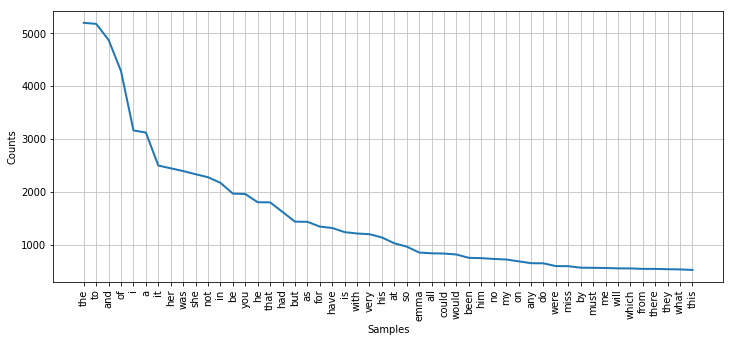

20 Most frequent usual words:
 [('the', 5198), ('to', 5179), ('and', 4875), ('of', 4284), ('i', 3164), ('a', 3124), ('it', 2500), ('her', 2448), ('was', 2396), ('she', 2336), ('not', 2279), ('in', 2173), ('be', 1970), ('you', 1962), ('he', 1806), ('that', 1804), ('had', 1623), ('but', 1439), ('as', 1436), ('for', 1346)]


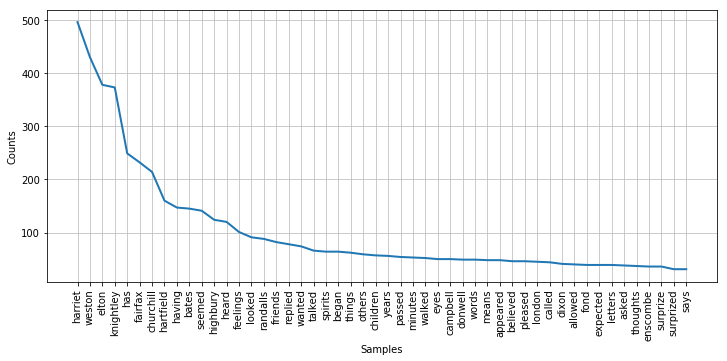

20 least frequent ununusual words:
 [('figures', 1), ('readier', 1), ('dispositions', 1), ('bids', 1), ('inclining', 1), ('jewels', 1), ('commended', 1), ('xix', 1), ('intervals', 1), ('created', 1), ('sounded', 1), ('acquiesced', 1), ('befriended', 1), ('robbed', 1), ('turkeys', 1), ('protected', 1), ('weddings', 1), ('veils', 1), ('deficiencies', 1), ('predictions', 1)]
Number of words:
 156935
Number of bigrams:
 145661
Set of bigrams:
 55087


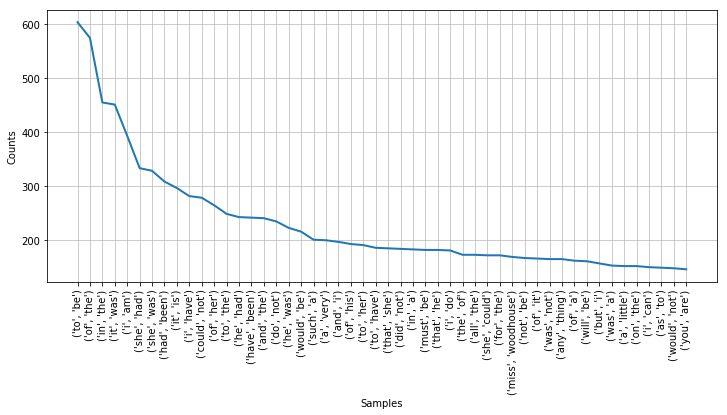

20 Most frequent usual words:
 [(('to', 'be'), 604), (('of', 'the'), 575), (('in', 'the'), 455), (('it', 'was'), 451), (('i', 'am'), 393), (('she', 'had'), 333), (('she', 'was'), 328), (('had', 'been'), 308), (('it', 'is'), 296), (('i', 'have'), 281), (('could', 'not'), 278), (('of', 'her'), 264), (('to', 'the'), 248), (('he', 'had'), 242), (('have', 'been'), 241), (('and', 'the'), 240), (('do', 'not'), 234), (('he', 'was'), 222), (('would', 'be'), 215), (('such', 'a'), 200)]
Number of trigrams:
 145653
Set of trigrams:
 145622


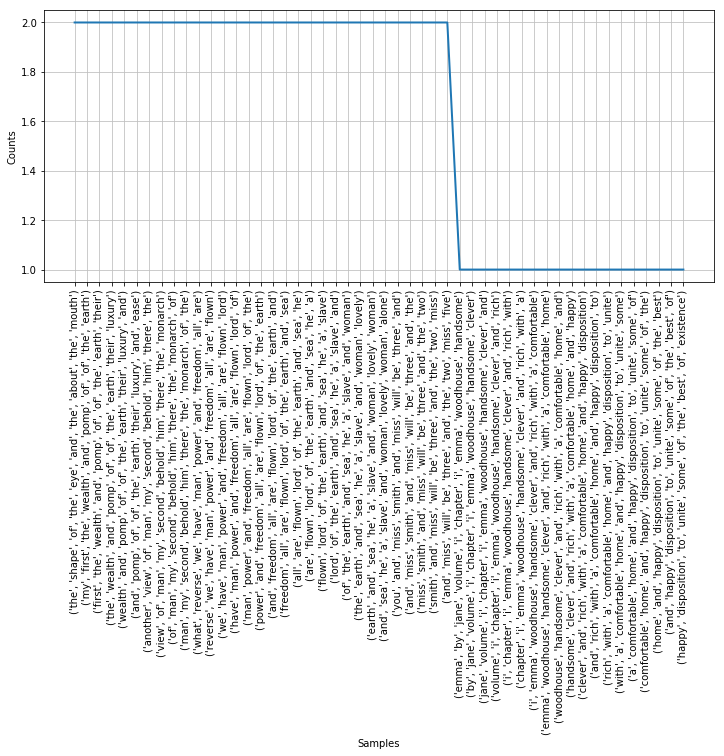

20 Most frequent usual words:
 [(('the', 'shape', 'of', 'the', 'eye', 'and', 'the', 'about', 'the', 'mouth'), 2), (('my', 'first', 'the', 'wealth', 'and', 'pomp', 'of', 'of', 'the', 'earth'), 2), (('first', 'the', 'wealth', 'and', 'pomp', 'of', 'of', 'the', 'earth', 'their'), 2), (('the', 'wealth', 'and', 'pomp', 'of', 'of', 'the', 'earth', 'their', 'luxury'), 2), (('wealth', 'and', 'pomp', 'of', 'of', 'the', 'earth', 'their', 'luxury', 'and'), 2), (('and', 'pomp', 'of', 'of', 'the', 'earth', 'their', 'luxury', 'and', 'ease'), 2), (('another', 'view', 'of', 'man', 'my', 'second', 'behold', 'him', 'there', 'the'), 2), (('view', 'of', 'man', 'my', 'second', 'behold', 'him', 'there', 'the', 'monarch'), 2), (('of', 'man', 'my', 'second', 'behold', 'him', 'there', 'the', 'monarch', 'of'), 2), (('man', 'my', 'second', 'behold', 'him', 'there', 'the', 'monarch', 'of', 'the'), 2), (('what', 'reverse', 'we', 'have', 'man', 'power', 'and', 'freedom', 'all', 'are'), 2), (('reverse', 'we', 'have',

In [41]:
#ch.1 3.3   Collocations and Bigrams
###########################################

# In corpus linguistics, a collocation is a sequence of words or terms that co-occur more often than would be expected by chance
# "red wine" is a collocation, but "the wine" is not.
# collocations are essentially just frequent bigrams
collacations=text_object.collocations(num=20);
print('Type of the variable "text1_raw" :', type(collacations))

# unusual words
######################

text_vocab = list(w.lower() for w in text1_list if w.isalpha()) # All the unique words in the text that are alphabetic
english_vocab = set(w.lower() for w in nltk.corpus.words.words()) # A standard list of words in nltk

unusual_text_words = [w.lower() for w in text_vocab if w not in english_vocab]
usual_text_words = [w.lower() for w in text_vocab if w in english_vocab]



fd = nltk.FreqDist(usual_text_words)
print('Number of usual_words:\n', len(set(usual_text_words)))
print('Number of usual_words B():\n', fd.B())
print('Number of usual_words N():\n', fd.N())

# 50 first most frequent words of usual_text_words
plt.figure(figsize=(12, 5))  # the size you want
fd.plot(50,cumulative=False) 
most_frequent=fd.most_common()
print('20 Most frequent usual words:\n', most_frequent[0:20])

fd = nltk.FreqDist(unusual_text_words)
# 50 first most frequent words of unusual_text_words
plt.figure(figsize=(12, 5))  # the size you want
fd.plot(50,cumulative=False) 
most_frequent=fd.most_common()
print('20 least frequent ununusual words:\n', most_frequent[-20:])

# prints the nummber of all words
print('Number of words:\n', len(text_vocab))

# ConditionalFreqDist
######################

# Bigrams
######################
text_bigrams=bigrams(usual_text_words);

fd = nltk.FreqDist(text_bigrams)

print('Number of bigrams:\n', (fd.N()))
print('Set of bigrams:\n', (fd.B()))

# plot of 50 first most frequent bigrams of usual_text_words
plt.figure(figsize=(12, 5))
fd.plot(50,cumulative=False) 
most_frequent=fd.most_common()
print('20 Most frequent usual words:\n', most_frequent[0:20])


# Trigrams
######################
text_trigrams = ngrams(usual_text_words,10);

fd = nltk.FreqDist(text_trigrams)

print('Number of trigrams:\n', (fd.N()))
print('Set of trigrams:\n', (fd.B()))

# plot of 50 first most frequent trigrams of usual_text_words
plt.figure(figsize=(12, 5))
fd.plot(50,cumulative=False) 
most_frequent=fd.most_common()
print('20 Most frequent usual words:\n', most_frequent[0:20])


#Generating Random Text with Bigrams
######################

#Shoebox and Toolbox Lexicons
######################


#WordNet
######################

In [0]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
...     'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
>>> cfd = nltk.ConditionalFreqDist(
...           (lang, len(word))
...           for lang in languages
...           for word in udhr.words(lang + '-Latin1'))
>>> cfd.plot(cumulative=True)